In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from uncertainties import ufloat
from uncertainties.umath import *  # sin(), etc.
import ZebraLib as zb
from scipy.optimize import curve_fit
import uncertainties.unumpy as un

import sys
sys.path.append('D:/UNESP/EngMec-UNESP/')
import frankenstein as fk

#info materias
cc = np.array(([42.5, 41.7, 41.3, 41.7], [27.9, 31.2, 31.2, 27.6]))
Ls = [0.199, 0.085, 0.199, 0.199]
Ds = [0.035, 0.05, 0.05, 0.05]
rhos = [2702, 2702, 2702, 8933]
Cps = [903, 903, 903, 385]

def h_calc(coef_ang, L, D, rho, Cp):
    V = L*np.pi*(D**2)/4
    As = (np.pi*D*L) + ((2*np.pi*(D**2))/4)
    return (coef_ang*rho*V*Cp)/(As)

def modelo(x, a, b):
    return a*x + b

def ln_theta(T, T_inf, Ti):
    return np.log((T-T_inf)/(Ti-T_inf))

def mV_to_T(mV):
    return 22.877*mV + 3.9395

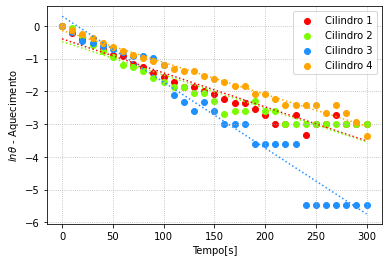

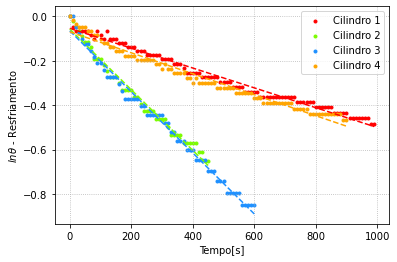

In [2]:
cores = ['red', 'lawngreen', 'dodgerblue', 'orange']
h_aq, h_resf = [], []

fig, ax = plt.subplots()
ax.set(xlabel='Tempo[s]', ylabel=r'$ln \theta$ - Aquecimento')

fig2, ax2 = plt.subplots()
ax2.set(xlabel='Tempo[s]', ylabel=r'$ln \theta$ - Resfriamento')

for i in range(4):
    df = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM II/Lab 3 - Cilindros/dados_3.xlsx', sheet_name=f'cilindro_{i+1}')
    
    t_aq = df['t_aq'].values; t_resf = df['t_resf'].values
    T_aq = mV_to_T(df['T_aq'].values); T_resf = mV_to_T(df['T_resf'].values)
    
    #tirando NaNs
    t_aq = t_aq[~np.isnan(t_aq)]; t_resf = t_resf[~np.isnan(t_resf)]
    T_aq = T_aq[~np.isnan(T_aq)]; T_resf = T_resf[~np.isnan(T_resf)]

    #AQUECIMENTO - FIG1
    #Dados experimentais
    x = t_aq;  y = ln_theta(T_aq, float(cc[0, i]+0.2), T_aq[0])
    ax.scatter(x, y, color=cores[i], label=f'Cilindro {i+1}')

    #Regressão
    coef, er = curve_fit(modelo, x, y)
    h_aq.append(h_calc(abs(coef[0]), Ls[i], Ds[i], rhos[i], Cps[i]))
    ax.plot(x, modelo(x, *coef), ls='dotted', color=cores[i])

    ax.legend()
    ax.grid(ls='dotted')

    #RESFRIAMENTO - FIG2
    #Dados experimentais
    x = t_resf;  y = ln_theta(T_resf, float(cc[1, i]+0.2), T_resf[0])
    ax2.scatter(x, y, color=cores[i], label=f'Cilindro {i+1}', s=9)

    #Regressão
    coef, er = curve_fit(modelo, x, y)
    h_resf.append(h_calc(abs(coef[0]), Ls[i], Ds[i], rhos[i], Cps[i]))

    ax2.plot(x, modelo(x, *coef), ls='--', color=cores[i])

    ax2.legend()
    ax2.grid(ls='dotted')
    
fig.savefig('aquec_ln.pdf', bbox_inches='tight')
fig2.savefig('resf_ln.pdf', bbox_inches='tight')

In [3]:
xx = pd.DataFrame({'cilindro':[1,2,3,4],'h_aq':h_aq, 'h_resf':h_resf})
print(xx.to_latex(index=0))

\begin{tabular}{rrr}
\toprule
 cilindro &       h\_aq &    h\_resf \\
\midrule
        1 & 203.714939 &  8.751536 \\
        2 & 240.434521 & 32.118732 \\
        3 & 544.890559 & 37.185014 \\
        4 & 371.688337 & 18.006445 \\
\bottomrule
\end{tabular}



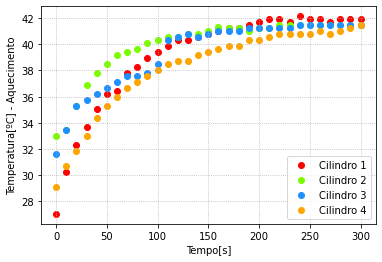

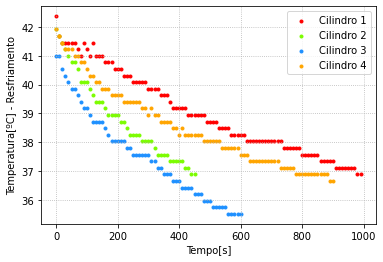

In [4]:
cores = ['red', 'lawngreen', 'dodgerblue', 'orange']
h_aq, h_resf = [], []

fig, ax = plt.subplots()
ax.set(xlabel='Tempo[s]', ylabel=r'Temperatura[ºC] - Aquecimento')

fig2, ax2 = plt.subplots()
ax2.set(xlabel='Tempo[s]', ylabel=r'Temperatura[ºC] - Resfriamento')

for i in range(4):
    df = pd.read_excel('D:/UNESP/EngMec-UNESP/Lab. TCM II/Lab 3 - Cilindros/dados_3.xlsx', sheet_name=f'cilindro_{i+1}')
    
    t_aq = df['t_aq'].values; t_resf = df['t_resf'].values
    T_aq = mV_to_T(df['T_aq'].values); T_resf = mV_to_T(df['T_resf'].values)
    
    #tirando NaNs
    t_aq = t_aq[~np.isnan(t_aq)]; t_resf = t_resf[~np.isnan(t_resf)]
    T_aq = T_aq[~np.isnan(T_aq)]; T_resf = T_resf[~np.isnan(T_resf)]

    #AQUECIMENTO - FIG1
    #Dados experimentais
    x = t_aq;  y = T_aq
    ax.scatter(x, y, color=cores[i], label=f'Cilindro {i+1}')

    ax.legend()
    ax.grid(ls='dotted')

    #RESFRIAMENTO - FIG2
    #Dados experimentais
    x = t_resf;  y = T_resf
    ax2.scatter(x, y, color=cores[i], label=f'Cilindro {i+1}', s=9)


    ax2.legend()
    ax2.grid(ls='dotted')
    
fig.savefig('aquec_T.pdf', bbox_inches='tight')
fig2.savefig('resf_T.pdf', bbox_inches='tight')